<a href="https://colab.research.google.com/github/erickvaldezsallagos/Codigo-serie-de-Fourier/blob/main/Ec_de_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ \frac{\partial ^2 U}{\partial t^2}=c^2 \frac{\partial ^2 U}{\partial x^2}$$


Con las condiciones de frontera

$$U(0,t)=0 \quad U(L,t)=0 \quad  \forall  t$$

Y las condiciones iniciales

$$U(x,0)=f(x)$$

con $$f(x)= \left\{\begin{matrix}
\frac{2k}{L}x & \text{ si }& 0<x<\frac{L}{2}  \\
\frac{2k}{L}(L-x)  & \text{ si }& \frac{L}{2}<x<L  \\
\end{matrix}\right.$$

$$g(x)==\frac{\partial U(x,0)}{\partial t}$$

#Solución:

Asignamos los valores de
$$g(x)=0, K=1, C=1, L=1$$
y las condiciones de frontera

$$X(0)=0 \hspace{0.2cm}\text{y} \hspace{0.2cm}X(1)=0$$

$$T'(0)=0$$

$$U(x,t)=X(x)T(t)$$

$$X''T=T''X$$

Obtenemos las ecuaciones

$$X''-KX=0$ .....(1)$$

$$T''-kT=0$ .....(2)$$

Resolviendo (1), problema de Sturm-Liouville

$$X(x)=Bsen(n\pi x)$$

Resolviendo (2)

$$T(t)=Acos(n\pi t)$$

De modo que

$$U(x,t)=C_nsen(n\pi x)cos(n\pi t)$$

$$U(x,0)=C_nsen(n\pi x)=f(x)$$

-----------------------------

#Ahora en series de fourier $f(x)$ en senos

$$f(x)=\sum_{n=1}^{\infty} [\frac{8}{(n\pi)^2}sen(\frac{n\pi}{2})]sen(n\pi x)$$

Por lo tanto
$$C_n=\frac{8}{(n\pi)^2}sen(\frac{n\pi}{2})$$

$$U(x,t)=[\frac{8}{(n\pi)^2}sen(\frac{n\pi}{2})]sen(n\pi x)cos(n\pi t)$$

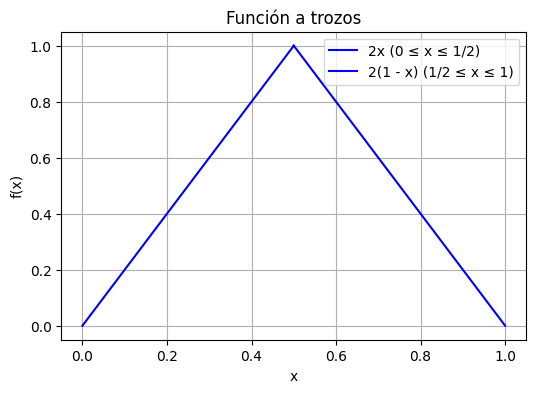

In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
x1 = np.linspace(0, 0.5, 100)
x2 = np.linspace(0.5, 1, 100)
y1 = 2 * x1
y2 = 2 * (1 - x2)
plt.figure(figsize=(6,4))
plt.plot(x1, y1, label='2x (0 ≤ x ≤ 1/2)', color='blue')
plt.plot(x2, y2, label='2(1 - x) (1/2 ≤ x ≤ 1)', color='blue')
plt.title('Función a trozos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

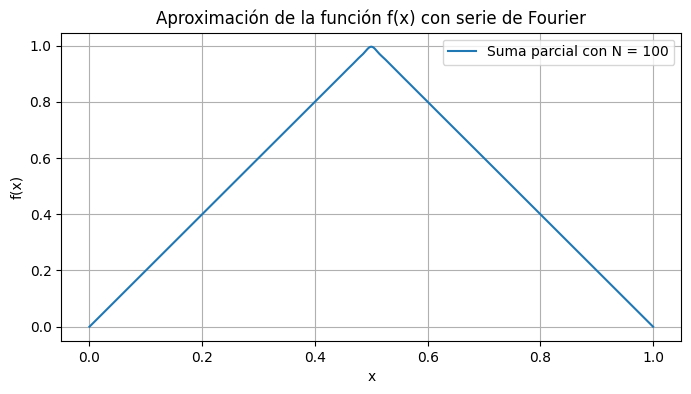

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
N=100
f = np.zeros_like(x)
for n in range(1, N+1):
    coef = (8 / ((n * np.pi) ** 2)) * np.sin(n * np.pi / 2)
    f += coef * np.sin(n * np.pi * x)
# Graficar
plt.figure(figsize=(8, 4))
plt.plot(x, f, label=f'Suma parcial con N = {N}')
plt.title('Aproximación de la función f(x) con serie de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


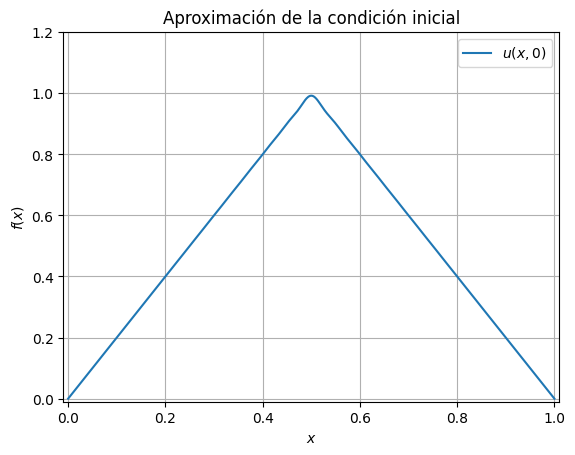

In [3]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (8 / ((n * np.pi) ** 2)) * np.sin(n * np.pi / 2)*np.sin(n * np.pi * x) * np.cos(n * np.pi * t[i])
    return f
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

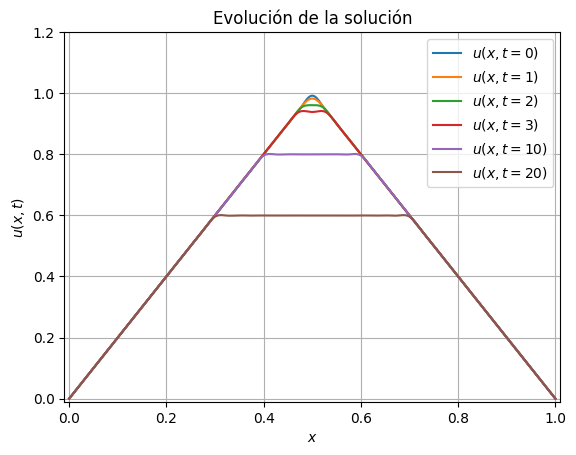

In [4]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

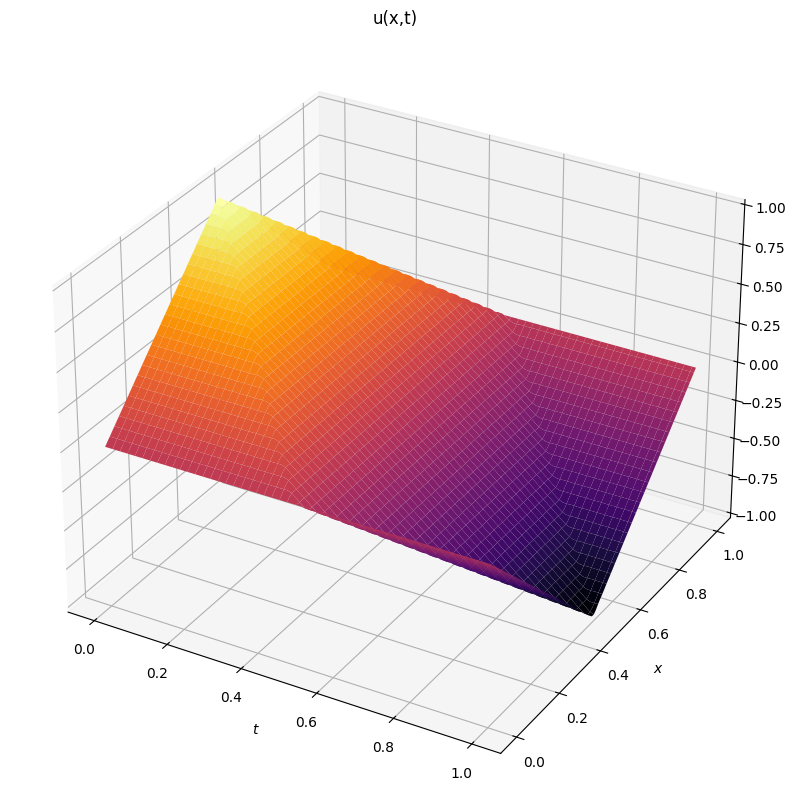

In [5]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"